In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

tf.reset_default_graph()

DimXY = 2  # 입력 파라미터 수(=2차원)
N_class = 3  # 라벨수
N = 100  # 분류당 샘플수

xy_data = np.loadtxt('data_cop.txt')
label_data = np.loadtxt('label_cop.txt')

X = tf.placeholder("float",[None, 2])
Y = tf.placeholder("float",[None, 3])


L=10
W12 = tf.Variable(tf.random_uniform([DimXY, L],0, 1))
b12 = tf.Variable(tf.zeros([1,L]))
Layer_1=tf.sigmoid(tf.matmul(X,W12) + b12)


W3 = tf.Variable(tf.random_uniform([L, N_class], 0, 1))
b3 = tf.Variable(tf.zeros([N_class]))
Out= tf.nn.softmax(tf.matmul(Layer_1,W3) + b3)

loss = tf.reduce_sum(-Y*tf.log(Out))

epslion = 0.001
optimizer = tf.train.GradientDescentOptimizer(epslion)
train = optimizer.minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y,1),tf.argmax(Out,1)),tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(200000):
        _, loss_value, accuracy = sess.run([train, loss, acc], feed_dict={X: xy_data, Y: label_data})
        if  step % 20000 == 0:
            print('손실 %8.4f 정확도 %.4f' %(loss_value,accuracy))
    save_path = saver.save(sess, "./cop02.ckpt")


손실 345.9759 정확도 0.3333
손실  89.7649 정확도 0.8600
손실  83.8743 정확도 0.8800
손실  79.0150 정확도 0.8833
손실  74.2740 정확도 0.8867
손실  70.8380 정확도 0.8933
손실  68.6652 정확도 0.8933
손실  67.0380 정확도 0.9033
손실  65.6885 정확도 0.9033
손실  64.5538 정확도 0.9100


INFO:tensorflow:Restoring parameters from ./cop02.ckpt


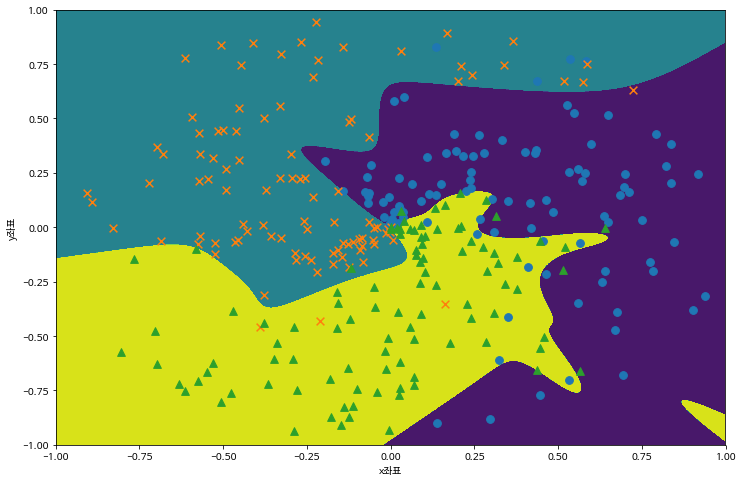

In [2]:
   
saver = tf.train.Saver()

h = 0.001
x_min, x_max = -1, 1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_range = np.c_[xx.ravel(), yy.ravel()]

sess = tf.InteractiveSession()
saver.restore(sess, "./cop02.ckpt") 
score = sess.run(Out, feed_dict={X:X_range})
sess.close()    

plt.figure(figsize=(12, 8))
plt.xlabel('x좌표')
plt.ylabel('y좌표')
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

markers = ['o', 'x', '^']
for i in range(N_class):
    plt.scatter(xy_data[i*N:(i+1)*N,0], xy_data[i*N:(i+1)*N,1], s=60, marker=markers[i])

plt.show()